In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde
import pandas as pd
import networkx as nx
from scipy.optimize import curve_fit

In [3]:
nb_path = os.getcwd()
dir_path = os.path.join(nb_path, '28.02')
files = os.listdir(dir_path)
files

['Counter-2-(0.1ph)_2022-02-28_21-20-32.txt',
 'Counter-2-(0.1ph)_2022-02-28_21-20-36.png',
 'Counter-2-(0.2ph)_2022-02-28_21-18-02.txt',
 'Counter-2-(0.2ph)_2022-02-28_21-18-06.png',
 'Counter-2-(0.3ph)_2022-02-28_21-14-58.txt',
 'Counter-2-(0.4ph)_2022-02-28_21-12-27.txt',
 'Counter-2-(0.6ph)_2022-02-28_20-51-39.txt',
 'Counter-2-(1ph)_2022-02-28_20-49-21.txt']

<IPython.core.display.Javascript object>


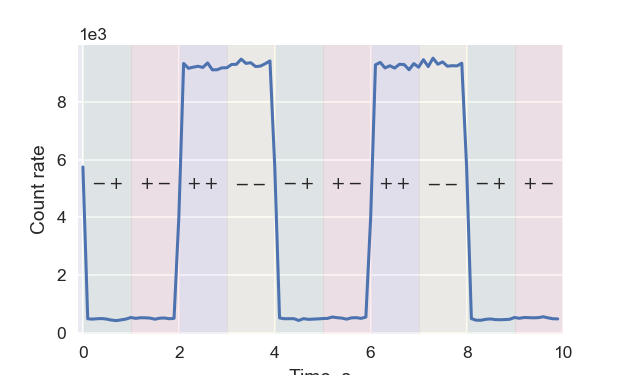

   x(ps)  counts  counts(1/s)
0    0.0    5747        57470
1    0.1     480         4800
2    0.2     468         4680
3    0.3     482         4820
4    0.4     487         4870


In [79]:
size = (3, 2)
plt.style.use('default')
plt.style.use('seaborn')
%matplotlib notebook
name = 'Counter-2-(0.4ph)_2022-02-28_21-12-27.txt'
file_path = os.path.join(dir_path, name)
fig = plt.figure(figsize=(5,3))
data = pd.read_csv(file_path, sep='\t')
print(data.head())
c = ['g','r','indigo','gold']
s = [r'$- -$', r'$- +$', r'$+ -$', r'$+ +$']
for i in range(10):
    plt.axvspan(i,i+1, color = c[(i)%4], alpha = 0.05)
    plt.text(i+0.5, 5000, s[(i+1)%4], horizontalalignment='center', fontsize=10)
plt.plot(data['x(ps)'][:len(data['counts(1/s)'])//10], data['counts'][:+len(data['counts(1/s)'])//10])
#plt.title('('+str(i)+')  '+r'$\mu=$'+name[name.rfind('(')+1:name.rfind('ph')], loc='left')
plt.xlabel('Time, s')#, fontsize=15)
plt.ylabel('Count rate')#, fontsize=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
plt.xlim((-0.1,10))
plt.savefig('mu04.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


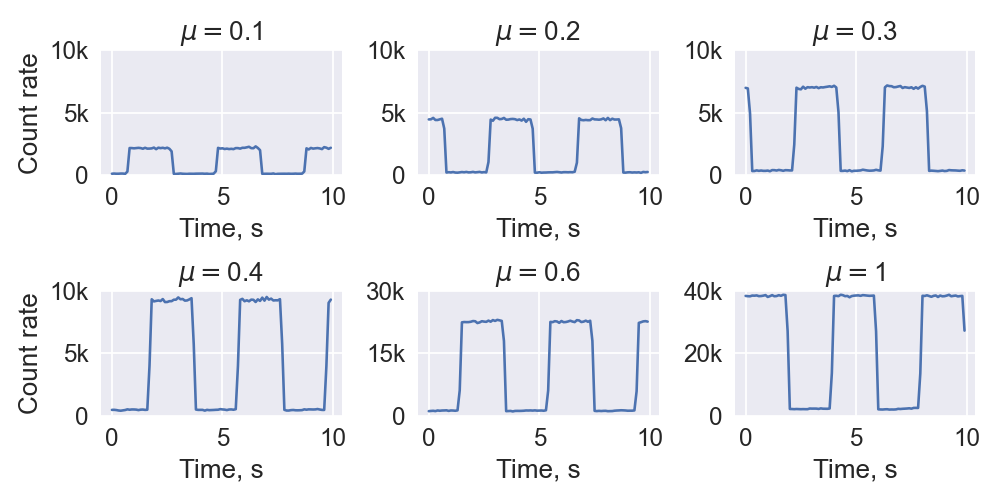

In [92]:
plt.style.use('seaborn')

data = dict()
c = ['g','r','indigo','gold']
s = [r'$+ -$', r'$- +$', r'$+ +$', r'$- -$']
i = 0
plt.subplots(figsize=(8,4))
t = np.array([30, 50, 80, 100, 240, 400])
t = t/2-t*0.1
d = [0,2,1,0,0,0]
fig = plt.subplot(1,6,1)
plt.ylabel('Count rate, (counts/s)')

contrast = {}
for name in files:
    
    file_path = os.path.join(dir_path, name)
    if name[-3:]=='txt':
        data = pd.read_csv(file_path, sep='\t')
        i+=1
        fig = plt.subplot(2,3,i)
        
        #plt.plot(data['x(ps)'][:len(data['counts(1/s)'])//10], data['counts(1/s)'][:len(data['counts(1/s)'])//10]/1000, linewidth=0.5)
        plt.title(r'$\mu=$'+name[name.rfind('(')+1:name.rfind('ph')], fontsize=15)
        plt.xlabel('Time, s', fontsize=15)
        if i in (1, 4):
            plt.ylabel('Count rate', fontsize=15)
        #print(round(max(data['counts(1/s)'])//10000+1)*10)
        plt.ylim(0,round(max(data['counts'])//10000+1)*10)
        plt.yticks(np.linspace(0, (round(max(data['counts'])//10000+1)*10), 3), 
                          [str(round(i))+'k' if i!=0 else str(round(i)) for i in np.linspace(0, (round(max(data['counts'])//10000+1)*10), 3)], fontsize=14)
        plt.xticks(fontsize=14)
        mu = float(name[name.rfind('(')+1:name.rfind('ph')])
        mid = (max(data['counts(1/s)'][:len(data['counts'])//10]/1000)+min(data['counts'][:len(data['counts'])//10]/1000))/2
        
        for x in range(1, len(data['counts'])//10):
            if data['counts'][x]/1000>mid and data['counts'][x-1]/1000<mid:
                x_0 = x
                break
        #plt.plot(data['x(ps)'][x], data['counts(1/s)'][x]/1000, '*')
        #plt.plot(0, mid, 'o')
        plt.plot(data['x(ps)'][:len(data['counts(1/s)'])//10], data['counts'][x_0:x_0+len(data['counts'])//10]/1000, linewidth=1.5)
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.tight_layout()
plt.savefig('mu.pdf')


<IPython.core.display.Javascript object>


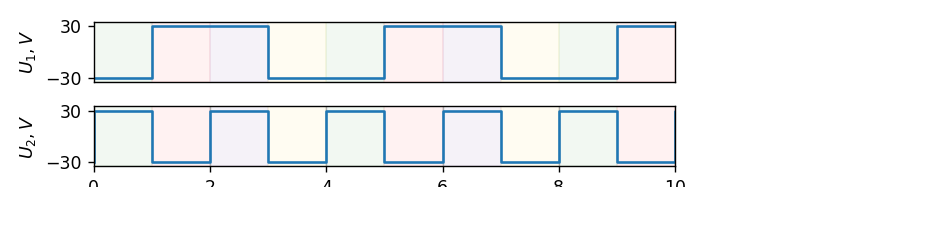

In [54]:
plt.subplots(figsize=(6, 1.5))
plt.subplots_adjust(hspace=0.4)
n=4

#0
# plt.subplot(3,1,1)

# c = ['g','r','indigo','gold']
# s = ['00', '01', '10', '11']
# for i in range(10):
#     plt.axvspan(i,i+1, color = c[i%4], alpha = 0.05)
#     plt.text(i+0.5, 0.4, s[i%4], horizontalalignment='center')

# plt.xlim(0,10)
# plt.xticks([])
# plt.yticks([])
# plt.ylabel(r'$U_1, V$')


#1
#plt.subplot(3,1,2)
plt.subplot(2,1,1)
for i in range(10):
    plt.axvspan(i,i+1, color = c[i%4], alpha = 0.05)
plt.ylim(-35,35)
plt.xlim(0,10)
plt.yticks([-30,30])
plt.xticks([])
plt.ylabel(r'$U_1, V$')

U = (np.array([0,1,1,1,1,0,0,0]*n))%2*2-1
t = np.arange(0, 4*n, 0.5).astype(int)
plt.plot(t[:-6],U[6:]*30)

#2
#plt.subplot(3,1,3)
plt.subplot(2,1,2)
for i in range(10):
    plt.axvspan(i,i+1, color = c[i%4], alpha = 0.05)
plt.ylim(-35,35)
plt.xlim(0,10)
plt.yticks([-30,30])
plt.xticks([])
plt.ylabel(r'$U_2, V$')

U = np.array([1,0,0,1,1,0,0,1]*n)*2-1
plt.plot(t[2:]-1, 30*(U[2:]))

plt.xlabel(r'$Time, s$')
plt.xticks(np.arange(6)*2)
plt.grid(axis='x')

plt.savefig('signal-modeling.pdf', bbox_inches='tight')

# Задача: посмотреть, сколько утекает от Боба в классическом канале

'a2.csv' -- в темноте общая мощность после Алисы порядка 600 мкВт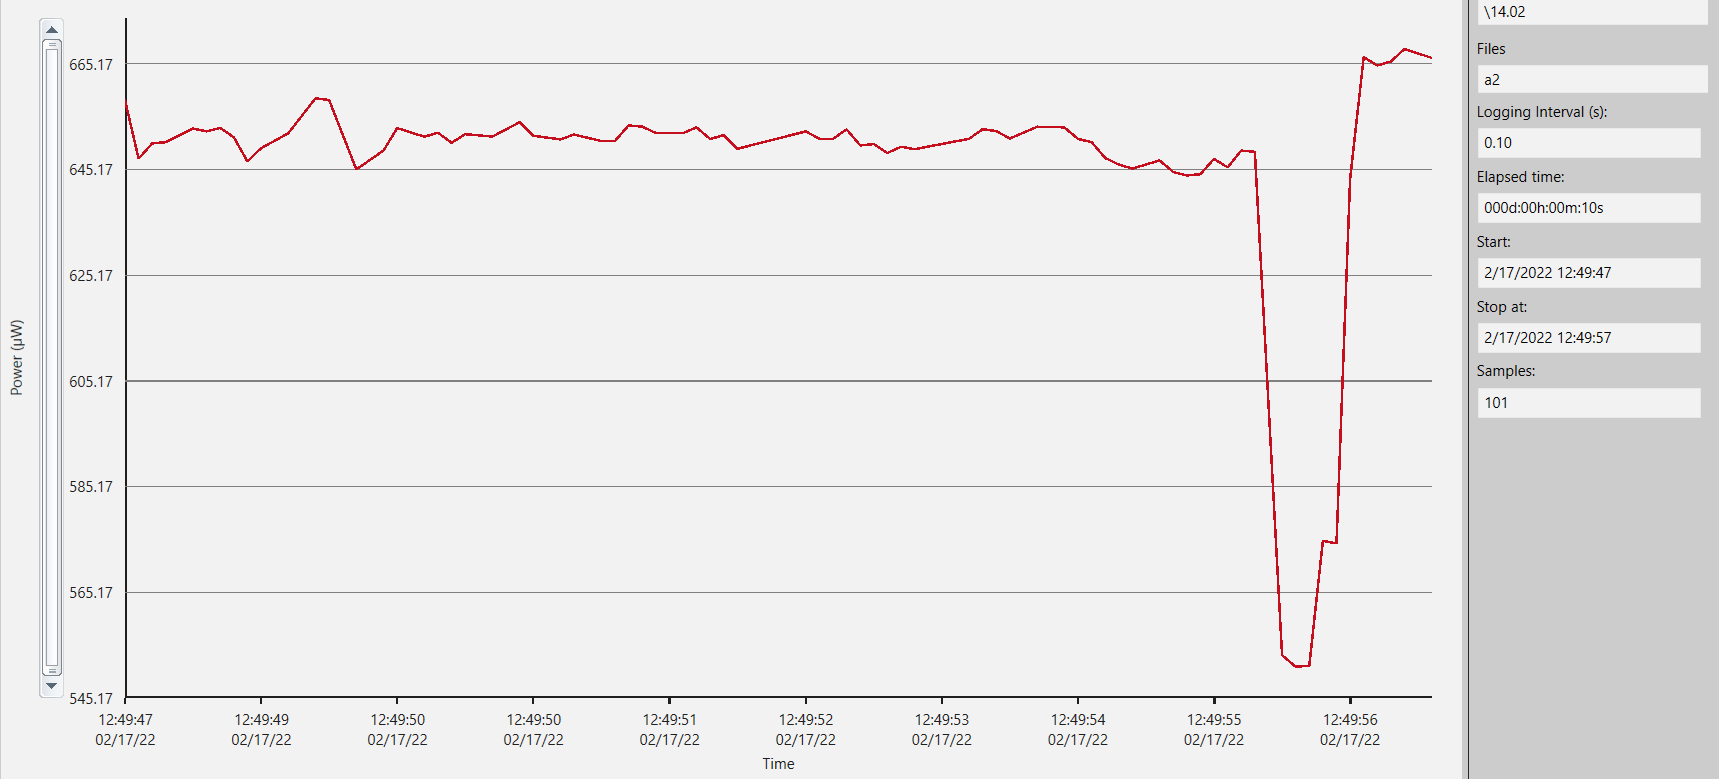

'ab.csv' мощность классической компоненты после Боба порядка 50 мкВт 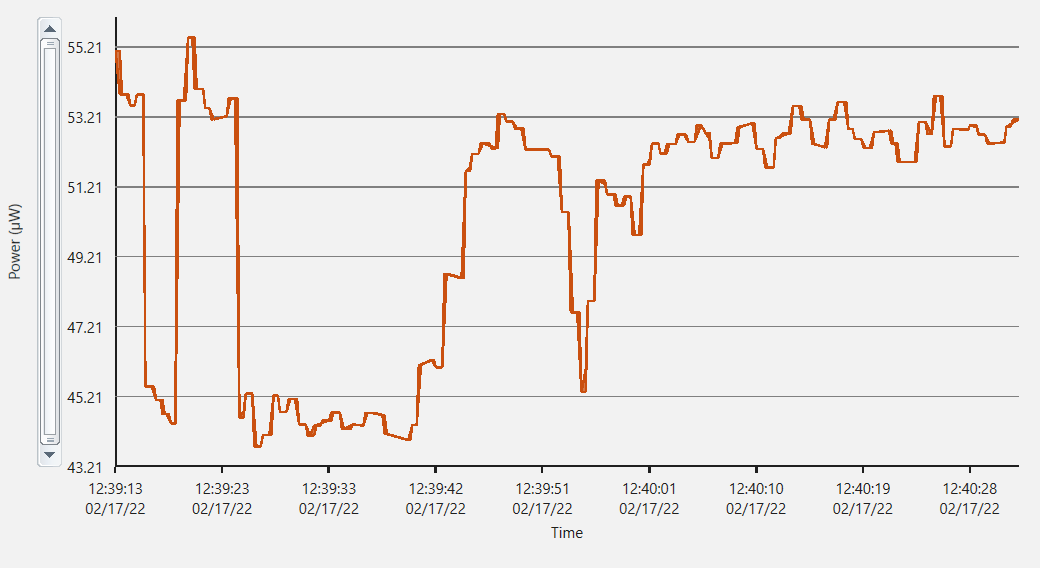

In [7]:
zeta = 50/650
F = 2 * 10**6
U = 30
alpha = 300
h = 6.63*10**(-34)
c = 3*10**8
lam = 850*10**(-9)
nu = c/lam
I_aH = F*h*nu
print('I_aH', I_aH)
I_a = I_aH*4*alpha**2/U**2
I_a0 =0.35e-10
print(I_a/(F*h*nu), I_a0/(F*h*nu))
print(I_a/(F*h*nu)*(U/2/alpha)**2, I_a0/(F*h*nu)*(U/2/alpha)**2)

I_aH 4.68e-13
400.0 74.78632478632478
1.0000000000000002 0.186965811965812


In [8]:
xi = 0.83/2.4
print(xi)
I = 4*alpha**2 *F*h*nu/U**2/xi
print('I', I, 'Вт=',I/F/h/nu )
print(np.cos(U/(2*alpha))**2)
print(xi*I/(F*h*nu))
I_bH = xi*zeta*I*U**2/alpha**2 
I_bV = xi*zeta*I
print('Вт в квантовом после боба', I_bH, 'Вт =', 10*np.log10(I_bH*1000),'дБм = ', I_bH/(F*nu*h), 'фотонов')
print('Вт в классическом после боба', I_bV, 'Вт =', 10*np.log10(I_bV*1000),'дБм = ', I_bV/(F*nu*h), 'фотонов')

0.3458333333333333
I 5.41301204819277e-10 Вт= 1156.6265060240964
0.997502082639013
399.9999999999999
Вт в квантовом после боба 1.44e-13 Вт = -98.4163750790475 дБм =  0.3076923076923077 фотонов
Вт в классическом после боба 1.44e-11 Вт = -78.41637507904751 дБм =  30.769230769230774 фотонов


In [9]:
I_aH_ph = np.array([0.1, 0.2, 0.3, 0.4, 0.6, 1])
I_aV_W = I_aH_ph*(F*h*nu)*4*alpha**2/U**2
10*np.log10(I_aV_W*1000)

array([-77.27694156, -74.2666416 , -72.50572901, -71.25634164,
       -69.49542905, -67.27694156])

In [10]:
44.4-67.3-10*np.log10(I_aV_W*1000)

array([54.37694156, 51.3666416 , 49.60572901, 48.35634164, 46.59542905,
       44.37694156])

In [11]:
0.6/1.8, 114/540

(0.3333333333333333, 0.2111111111111111)

# Задача: посчитать среднюю мощность лазера, при которой в квантовой компоненте 1 фотон

In [12]:
alpha = 0.3 * 10**3 #kW
lam = 850 * 10**(-9) #nm
F = 2 * 10**6 #2MHz
U = 30 #V
c = 3 * 10**8

In [13]:
plt.plot(data['a2.csv'][1], label='meas')
I_V = np.mean(data['a2.csv'][1][:60])
plt.plot(np.arange(60), np.full((60), I_V), label='average')
plt.legend()

KeyError: 'a2.csv'

$I_0\sim650mkW$ 

<IPython.core.display.Javascript object>


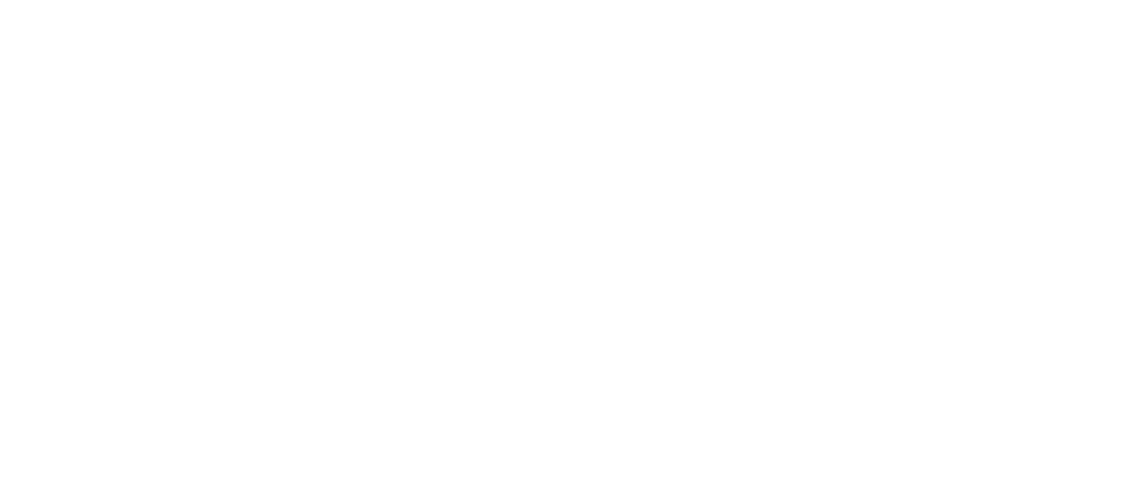

NameError: name 'I_V' is not defined

In [353]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
U_range = np.arange(-40, 40)
ax1.plot(U_range, I_V*np.sin(U_range/(2*alpha))**2)
ax2.plot(U_range, np.sin(U_range/(2*alpha))**2)
phi_U = U/alpha
I_H = I_V*np.sin(U/(2*alpha))**2
a = np.sin(U/(2*alpha))**2
ax1.plot(U, I_H, '.', label = 'I(30V)='+str(round(I_H, 7))+' W')
ax2.plot(U, a, '.', label = 'I(30V)='+str(round(a, 4))+' W')

ax1.legend()
ax2.legend()

ax1.set_xlabel('V, Volt')
ax2.set_xlabel('V, Volt')

ax1.set_ylabel('I, W')
ax2.set_ylabel(r'$I_H/I_0$')


ax1.set_title(r'$I_H(U)$')
ax2.set_title(r'$I_H/I_0(U)$')
print(r'Доля, попавшая в I_H', a)

In [354]:
P_av = I_V
h = 6.6 * 10**(-34)
E_ph = h*с/lam
P_av/(F*E_ph)

NameError: name 'I_V' is not defined

In [355]:
nb_path = os.getcwd()
dir_path = os.path.join(nb_path, '21.02')
files = os.listdir(dir_path)
files

['+-30_2022-02-21_16-24-14.txt',
 'Correlation_2022-02-21_16-26-15.txt',
 'Counter-2_2022-02-21_16-05-21.txt',
 'Counter-2_2022-02-21_16-08-58.txt',
 'Counter-2_2022-02-21_16-10-51.txt',
 'Counter-2_2022-02-21_16-22-51.txt',
 'dark_2022-02-21_16-23-09.txt',
 'laser+crystals_2022-02-21_16-25-46.txt']

<IPython.core.display.Javascript object>


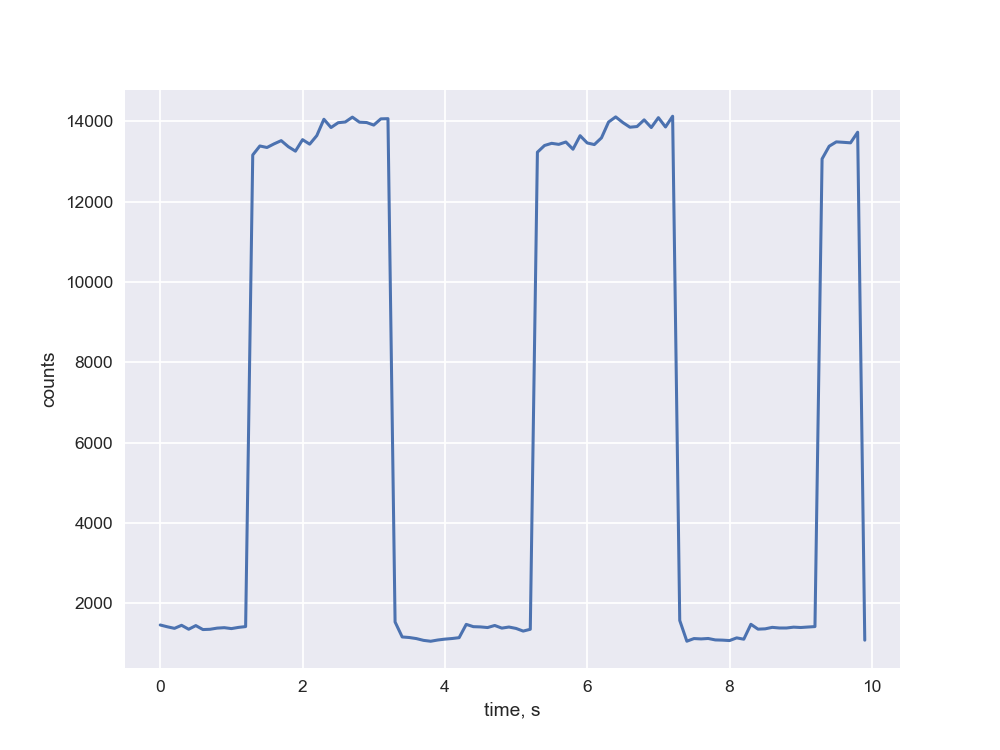

In [357]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[0])
file = pd.read_csv(file_path, sep='\t')
plt.figure(figsize=size)
plt.plot(file['x(ps)'], file['counts'])
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)

In [358]:
print(files[0], 14000-)

SyntaxError: invalid syntax (<ipython-input-358-0ff10dedf325>, line 1)

<IPython.core.display.Javascript object>


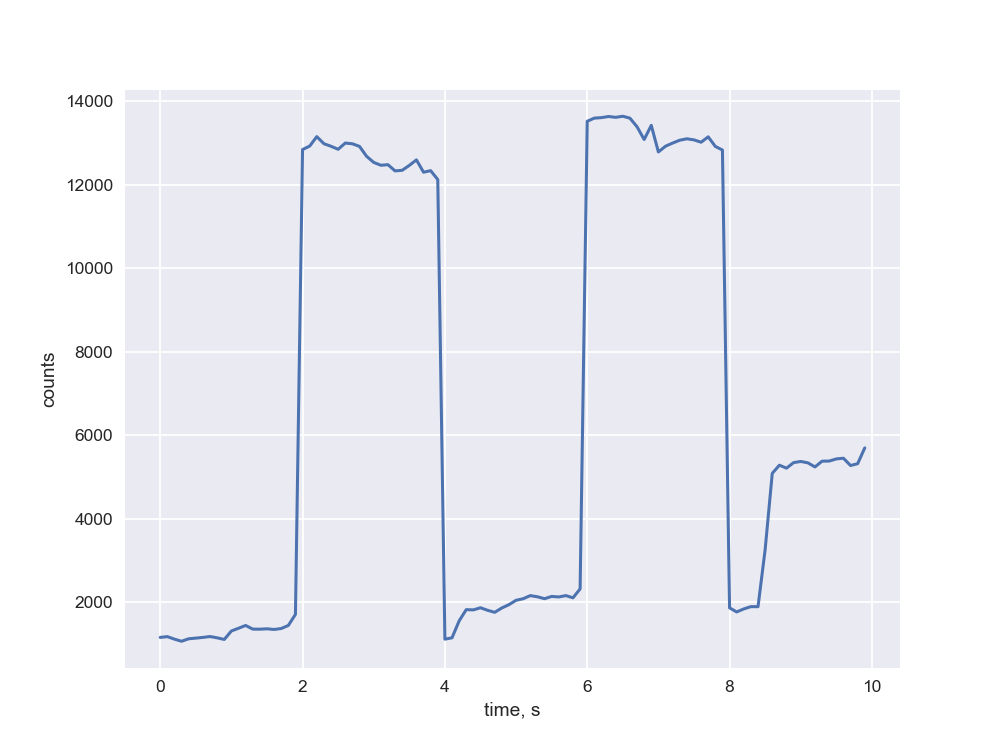

In [360]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[2])
file = pd.read_csv(file_path, sep='\t')
plt.figure(figsize=size)
plt.plot(file['x(ps)'], file['counts'])
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)

<IPython.core.display.Javascript object>


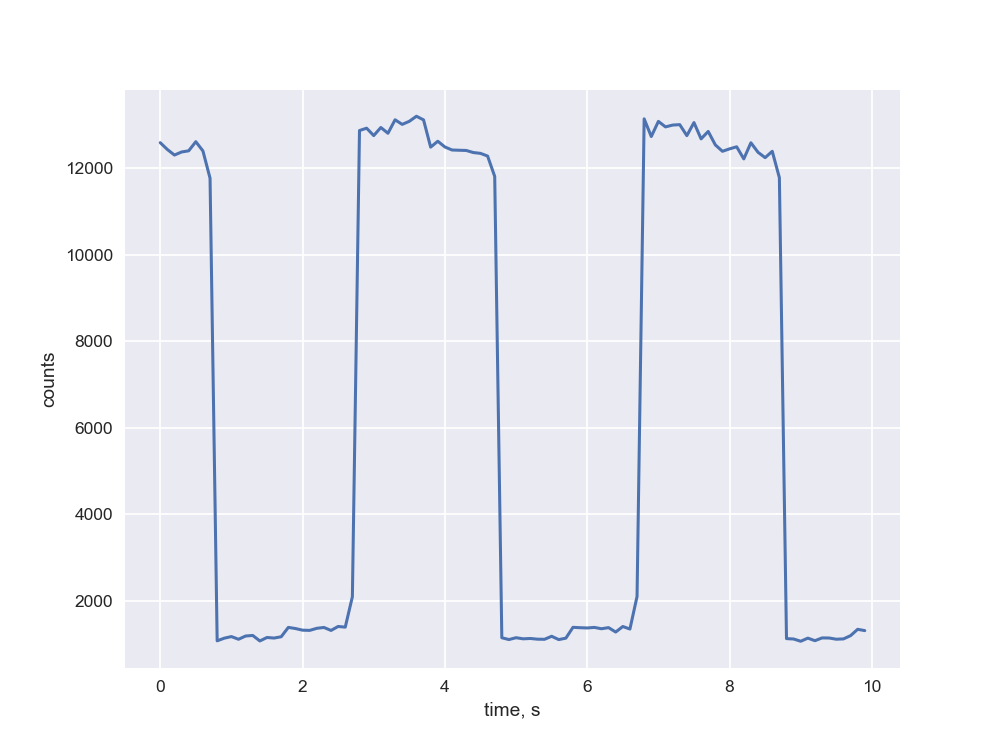

In [361]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[3])
file = pd.read_csv(file_path, sep='\t')
plt.figure(figsize=size)
plt.plot(file['x(ps)'], file['counts'])
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)

<IPython.core.display.Javascript object>


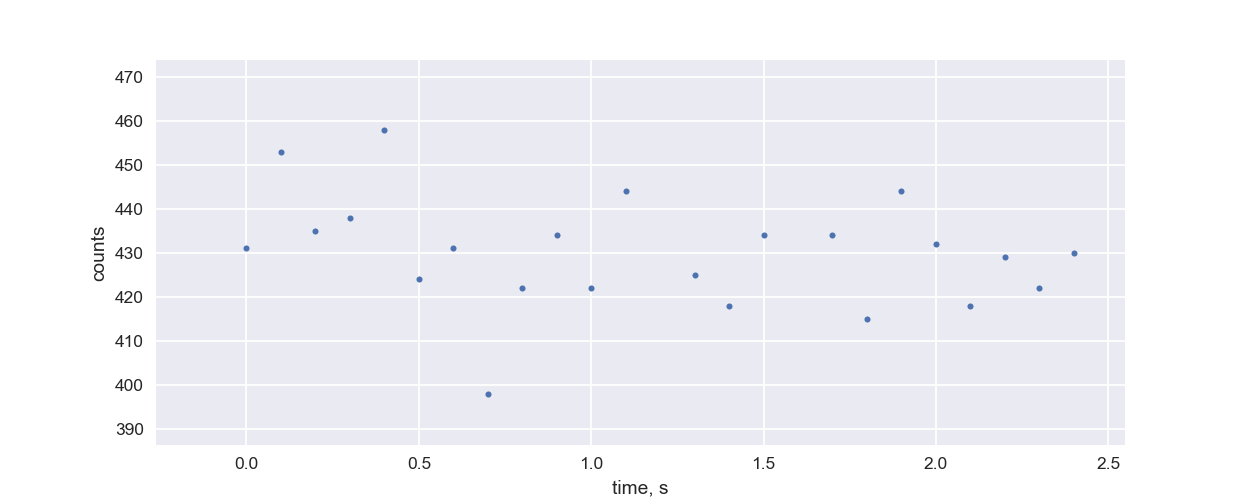

In [30]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[4])
file = pd.read_csv(file_path, sep='\t')
plt.figure(figsize=(10,4))
plt.plot(file['x(ps)'], file['counts'],'.')
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)

<IPython.core.display.Javascript object>


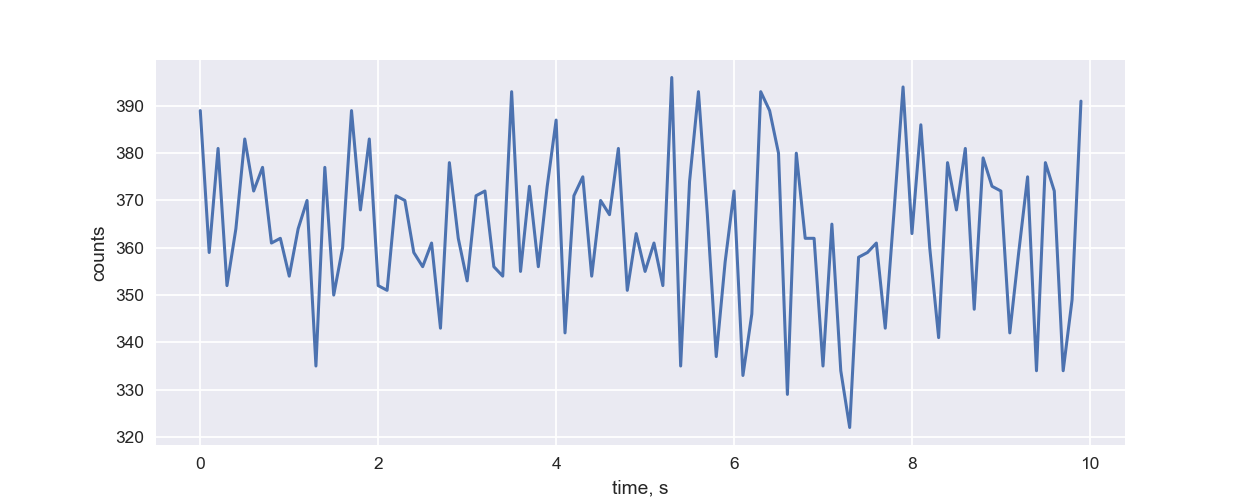

363.64

In [38]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[5])
file = pd.read_csv(file_path, sep='\t')
plt.figure(figsize=(10,4))
plt.plot(file['x(ps)'], file['counts'])
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)
mean = np.mean(file['counts'])
mean

<IPython.core.display.Javascript object>


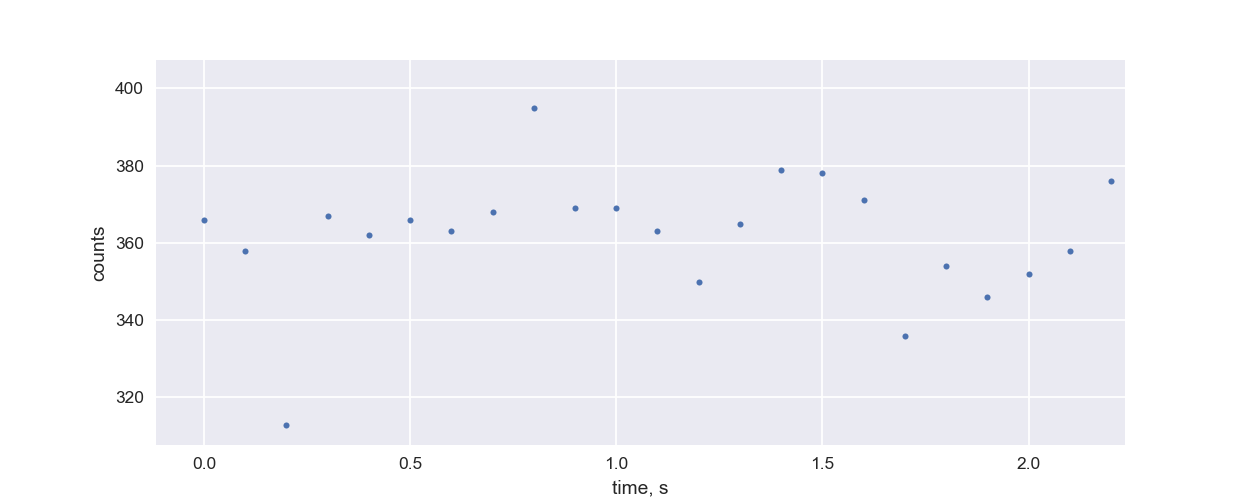

3618.8999999999996

In [37]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[6])
file = pd.read_csv(file_path, sep='\t')
mean = np.mean(file['counts'])
plt.figure(figsize=(10,4))
plt.plot(file['x(ps)'], file['counts'], '.')
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)
mean*10

In [62]:
file.head()

,x(ps),counts,counts(1/s)
0,0.0,366,3660
1,0.1,358,3580
2,0.2,313,3130
3,0.3,367,3670
4,0.4,362,3620


   x(ps)  counts  counts(1/s)  counts.1  counts(1/s).1
0    0.0  199987      1999870     13220         132200
1    0.1  199987      1999870     13328         133280
2    0.2  199987      1999870     13488         134880
3    0.3  199987      1999870     13163         131630
4    0.4  199986      1999860     13207         132070


<IPython.core.display.Javascript object>


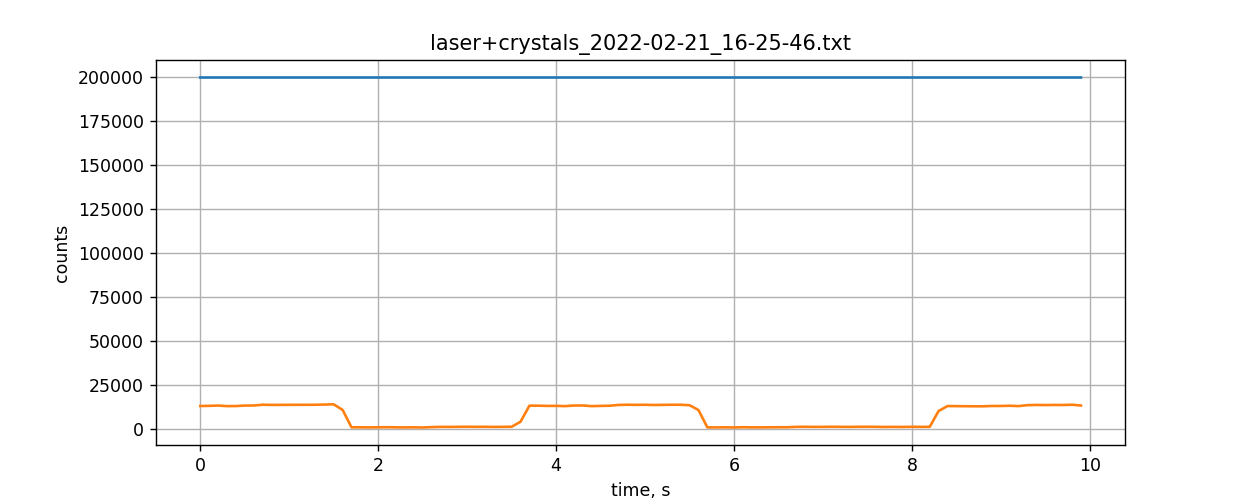

In [63]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[7])
file = pd.read_csv(file_path, sep='\t')
print(file.head())
plt.figure(figsize=(10,4))
plt.plot(file['x(ps)'], file['counts'])
plt.plot(file['x(ps)'], file['counts.1'])
plt.xlabel('time, s')
plt.ylabel('counts')
plt.title(files[7])
plt.grid(True)

# Измерения для разных $\mu$

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
nb_path = os.getcwd()
dir_path = os.path.join(nb_path, '28.02')
files = np.array(os.listdir(dir_path))
files = [i for i in files if i[-1]=='t']
files

['Counter-2-(0.1ph)_2022-02-28_21-20-32.txt',
 'Counter-2-(0.2ph)_2022-02-28_21-18-02.txt',
 'Counter-2-(0.3ph)_2022-02-28_21-14-58.txt',
 'Counter-2-(0.4ph)_2022-02-28_21-12-27.txt',
 'Counter-2-(0.6ph)_2022-02-28_20-51-39.txt',
 'Counter-2-(1ph)_2022-02-28_20-49-21.txt']

<IPython.core.display.Javascript object>


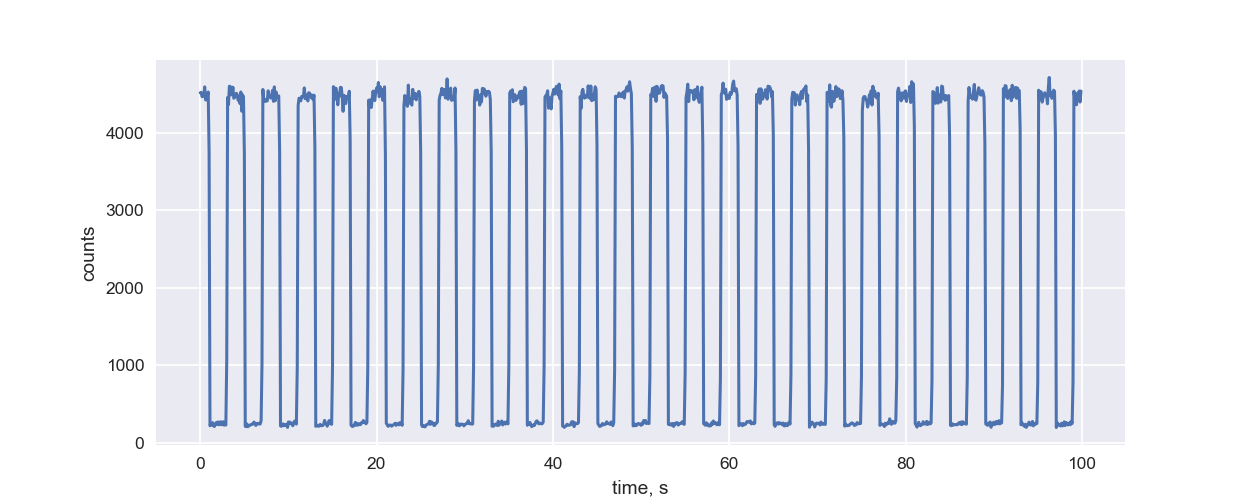

In [9]:
%matplotlib notebook
file_path = os.path.join(dir_path, files[1])
file = pd.read_csv(file_path, sep='\t')
plt.figure(figsize=(10,4))
plt.plot(file['x(ps)'], file['counts'])
plt.xlabel('time, s')
plt.ylabel('counts')
plt.grid(True)

# Посчитать q -- потери в канале

In [10]:
alpha = 0.3 * 10**3 #W
lam = 850 * 10**(-9) #m
F = 2 * 10**6 #Hz
U = 30 #V
c = 3 * 10**8 #m/s
zeta = 0.077
dt = 0.1#s
114/540

0.2111111111111111

<IPython.core.display.Javascript object>


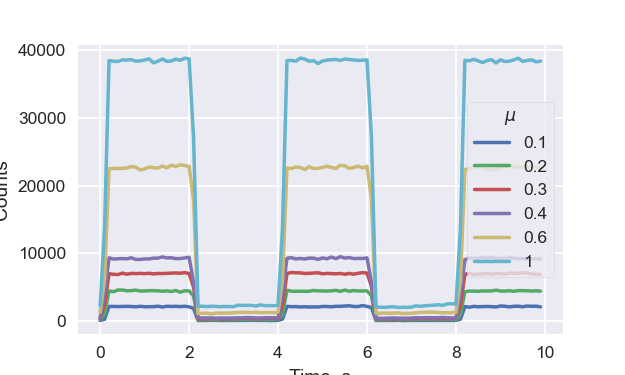

noise
20
Counter-2-(0.1ph)_2022-02-28_21-20-32.txt 9
Counter-2-(0.2ph)_2022-02-28_21-18-02.txt 29
Counter-2-(0.3ph)_2022-02-28_21-14-58.txt 24
Counter-2-(0.4ph)_2022-02-28_21-12-27.txt 19
Counter-2-(0.6ph)_2022-02-28_20-51-39.txt 16
Counter-2-(1ph)_2022-02-28_20-49-21.txt 1


In [11]:
%matplotlib notebook
plt.style.use('seaborn')
size = (6, 4)
dir_path = '28.02'
size = (5, 2.5)
files = os.listdir(dir_path)
plt.figure(figsize=(5,3))
for name in files:
    if name[-3:]=='txt':
        file_path = os.path.join(dir_path, name)
        data = pd.read_csv(file_path, sep='\t')
        if name[name.find('(')+1:name.find(')')]=='0.1ph':
            noise = 20
            print('noise')
            print(noise)
        start = 0
        for i in range(30):
            if start==0 and data['counts'][i+2]-data['counts'][i]>np.mean(data['counts']):
                start = i
        print(name, start)
        plt.plot(data['x(ps)'][:100], data['counts'][start:start+100]-noise, linewidth=2, label=name[name.find('(')+1:name.find(')')-2])
        #a = float(name[name.find('(')+1:name.find(')')-2])
        #plt.plot(data['x(ps)'][:100]-a, 0.2*np.mean(data['counts'])*np.ones_like(data['x(ps)'][:100]))
plt.ylabel('Counts')
plt.xlabel('Time, s')
plt.grid(True)
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend(frameon=True,loc='right', title=r'$\mu$')
plt.savefig('mu.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


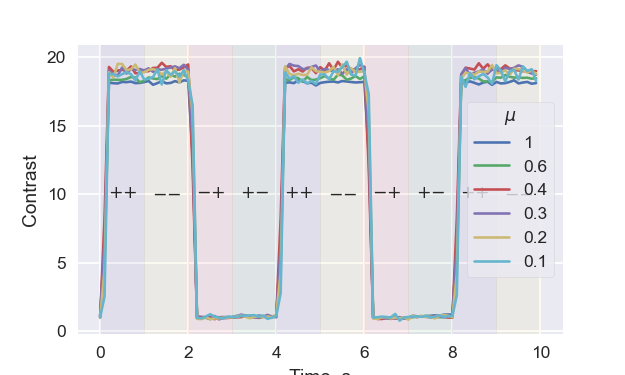

In [54]:
%matplotlib notebook
plt.style.use('seaborn')
dir_path = '28.02'
files = os.listdir(dir_path)
files = [i for i in files if 'txt' in i]
c = {0:'g',1:'r',8:'indigo',9:'gold'}#0,1,8,9
chrs = [9,1,0,8]
lbl = {0: r'$\plus\minus$', 1: r'$\minus\plus$', 8: r'$\plus\plus$', 9: r'$\minus\minus$'}
plt.figure(figsize=(5,3))
for file in files[::-1]:
    file_path = os.path.join(dir_path, file)
    name = file[file.find('(')+1:file.find(')')-2]
    data = pd.read_csv(file_path, sep='\t')
    start = 0
    for i in range(30):
        if start==0 and data['counts'][i+2]-data['counts'][i]>np.mean(data['counts']):
            start = i
    #print(name, start)
    mean = 0.11*np.mean(data['counts'])
    data_noise = data[data<mean]
    noise = np.mean(data_noise['counts'])
    
    dark = 0
    plt.plot(data['x(ps)'][:100], (data['counts'][start:start+100]-dark)/(noise-dark), linewidth=1.5, label=name)

for x_0 in range(10):
    i = x_0+3
    plt.axvspan(x_0,x_0+1, color = c[chrs[i%4]], alpha = 0.05)
    plt.text(x_0+0.5, 9.7, lbl[chrs[i%4]], horizontalalignment='center', fontsize=10)
    
plt.ylabel('Contrast')
plt.xlabel('Time, s')
plt.legend(frameon=True, title=r'$\mu$', loc='right')
plt.savefig('mu_norm.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


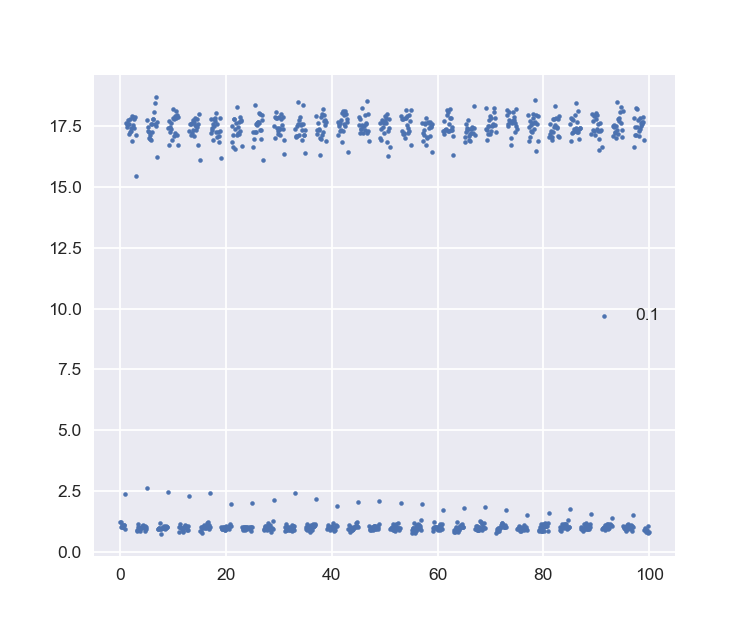

<IPython.core.display.Javascript object>


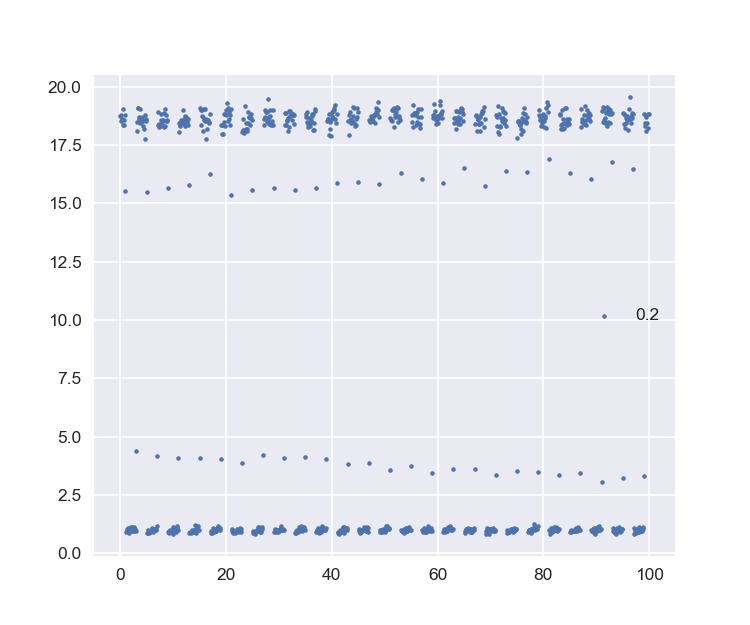

<IPython.core.display.Javascript object>


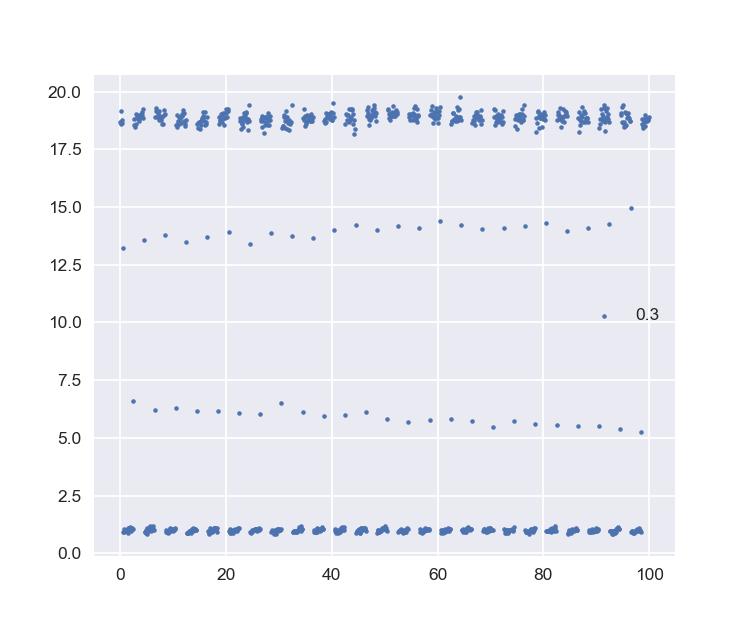

<IPython.core.display.Javascript object>


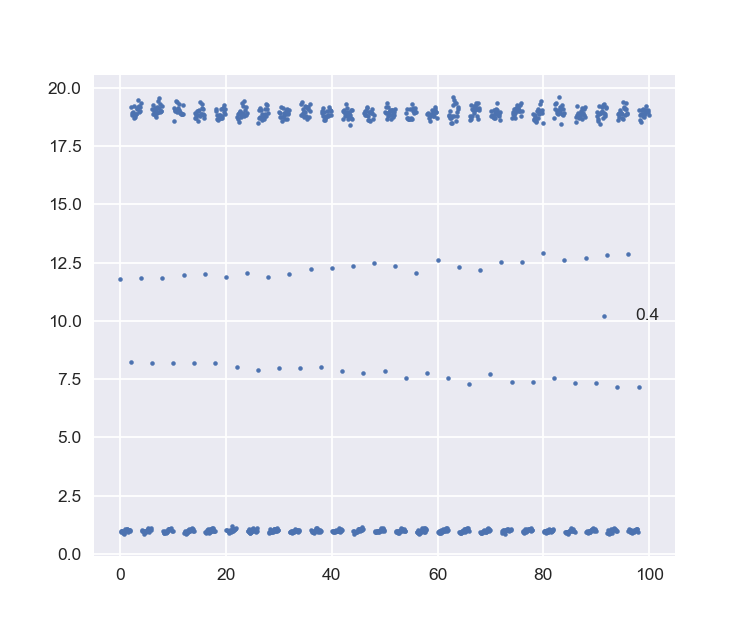

<IPython.core.display.Javascript object>


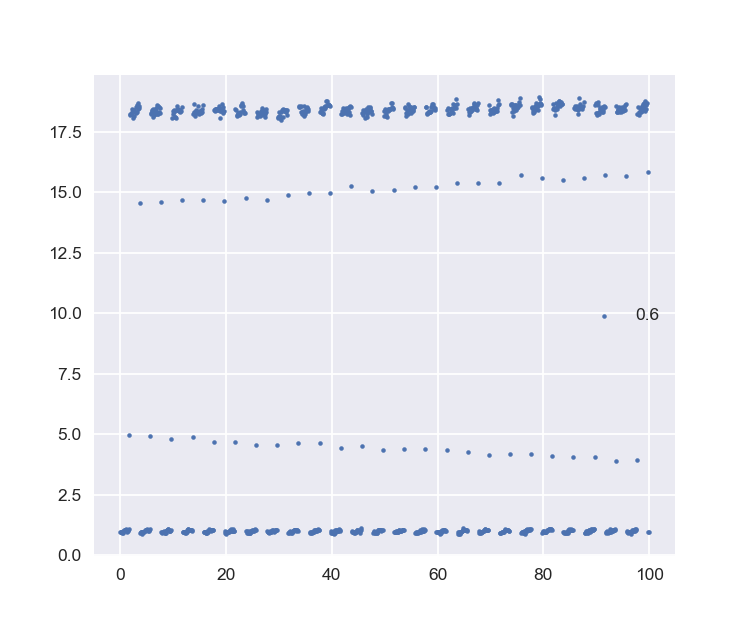

<IPython.core.display.Javascript object>


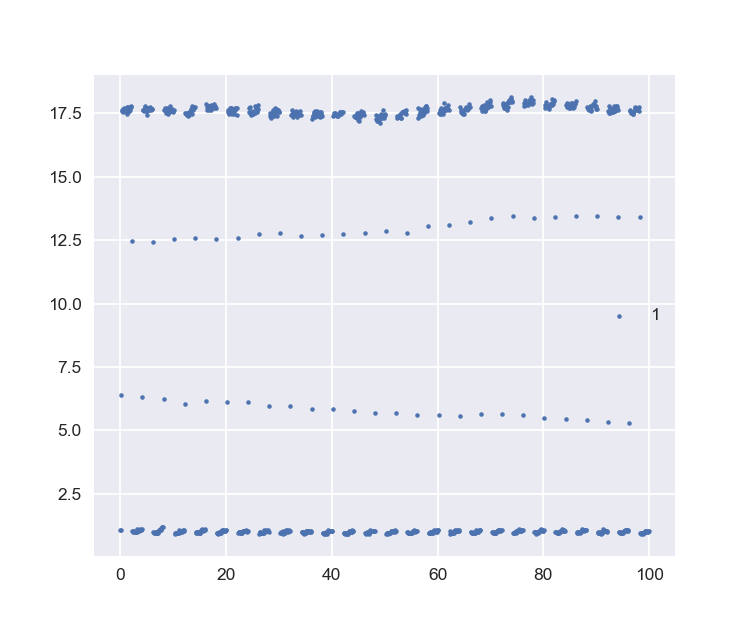

In [544]:
for file in files:
    name = file[file.find('(')+1:file.find(')')-2]
    file_path = os.path.join(dir_path, file)
    data = pd.read_csv(file_path, sep='\t')
    
    mean = 0.15*np.mean(data['counts'])
    data_noise = data[data<mean]
    noise = np.mean(data_noise['counts'])
    plt.figure(figsize=(6,5))

    plt.scatter(data['x(ps)'], data['counts']/noise, s=5, label=name)
    #plt.scatter(data_noise['x(ps)'], data_noise['counts'], s=5, label=name)
    
    #plt.plot(data['x(ps)'], np.ones_like(data['x(ps)'])*mean)
    plt.legend()

<IPython.core.display.Javascript object>


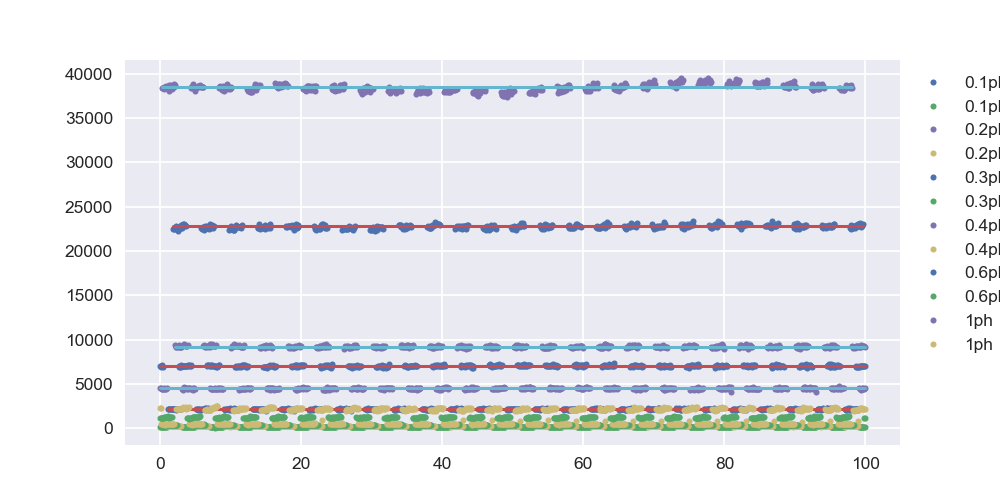

theory experiment th/exp contrast
0.1      0.097      0.97      16.667104686009417
noise 0.0013
0.2      0.202      1.01      17.21952681032464
noise 0.00261
0.3      0.317      1.0566666666666666      18.872680557900466
noise 0.00373
0.4      0.416      1.0399999999999998      18.948783704873165
noise 0.00487
0.6      1.025      1.7083333333333333      18.41789283104735
noise 0.01236
1.0      1.727      1.727      17.63870072375169
noise 0.0218


In [568]:
%matplotlib notebook
from scipy.interpolate import interp1d
dir_path = '28.02'
files = os.listdir(dir_path)
plt.figure(figsize=(8,4))
zeta = 0.21
delta = []
print('theory', 'experiment', 'th/exp', 'contrast')
p = []
for name in files:
    if name[-3:]=='txt':
        file_path = os.path.join(dir_path, name)
        data = pd.read_csv(file_path, sep='\t')

        data_bob = data[data['counts']>1.7*np.mean(data['counts'])]
        data_noise = data[data['counts']<0.4*np.mean(data['counts'])]
        l = name[name.find('(')+1:name.find(')')]
        plt.plot(data_bob['x(ps)'], data_bob['counts'], '.', label=l)
        plt.plot(data_noise['x(ps)'], data_noise['counts'], '.', label=l)
        
        x = np.linspace(min(data_bob['x(ps)']), max(data_bob['x(ps)']), 100)
        params, error = curve_fit(lambda x, a: a, data_bob['x(ps)'], data_bob['counts'])
        signal = params[0]
        params, error = curve_fit(lambda x, a: a, data_noise['x(ps)'], data_noise['counts'])
        noise = params[0]
        plt.plot(x, signal*np.ones_like(x))
        ph_th = float(name[name.find('(')+1:name.find('ph')])
        ph_exp = np.round((signal - noise)*2/(dt*F*zeta), 3)
        p.append([ph_th, ph_exp, signal, noise])
        print(np.round(ph_th, 2), np.round(ph_exp, 3), ph_exp/ph_th, signal/noise, sep='      ')
        delta.append(np.abs(ph_exp-ph_th)/ph_th)
        print('noise', np.round(noise*2/(dt*F), 5))
plt.legend(bbox_to_anchor =(1,1))

In [571]:
delta

[0.030000000000000027,
 0.010000000000000009,
 0.05666666666666672,
 0.0399999999999999,
 0.7083333333333333,
 0.7270000000000001]

<IPython.core.display.Javascript object>


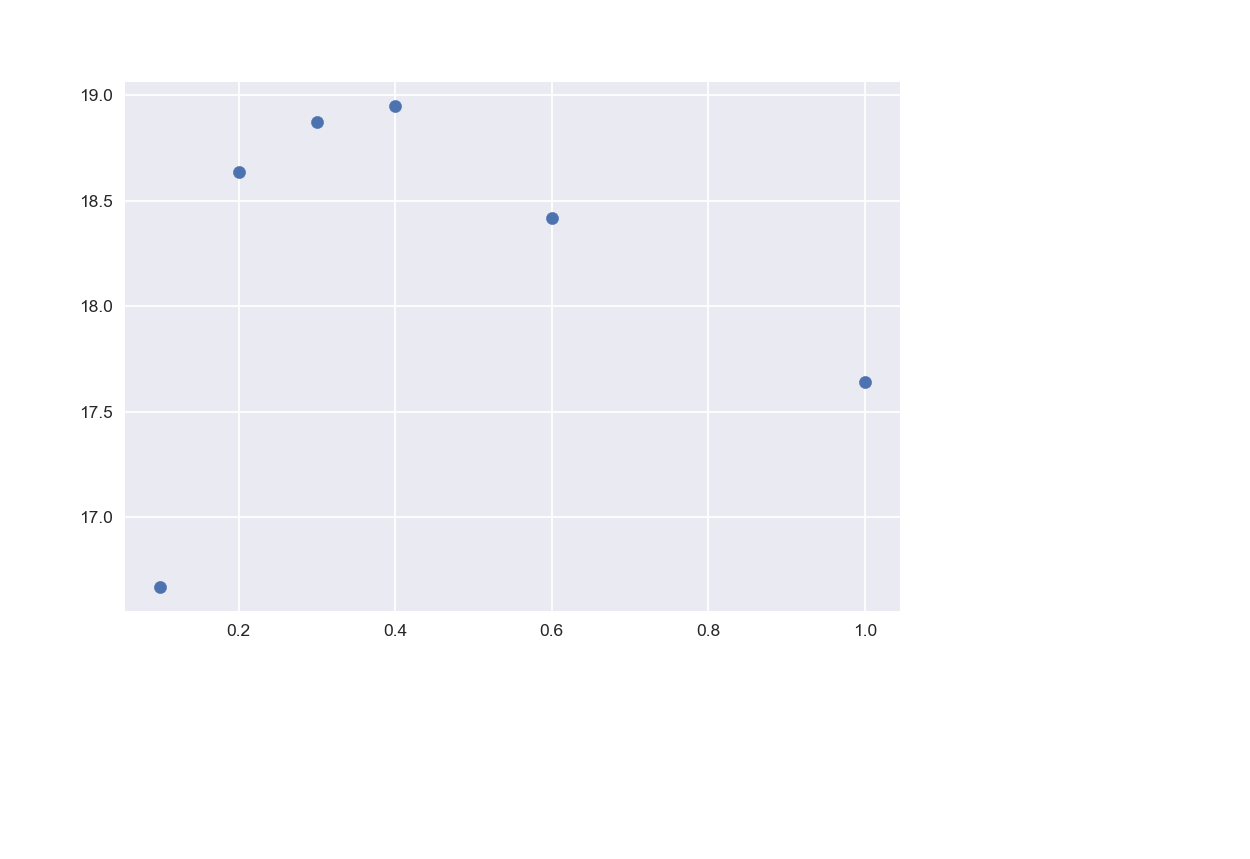

(array([16.66710469, 18.63686149, 18.87268056, 18.9487837 , 18.41789283,
        17.63870072]),
 18.197003998516138,
 0.8079059846065115)

In [420]:
%matplotlib notebook
plt.scatter(p_np[:, 0], p_np[:, 2]/p_np[:, 3])
p_np[:, 2]/p_np[:, 3], np.mean(p_np[:, 2]/p_np[:, 3]), np.std(p_np[:, 2]/p_np[:, 3])

In [428]:
2.7e-7/6e-9

45.0

<IPython.core.display.Javascript object>


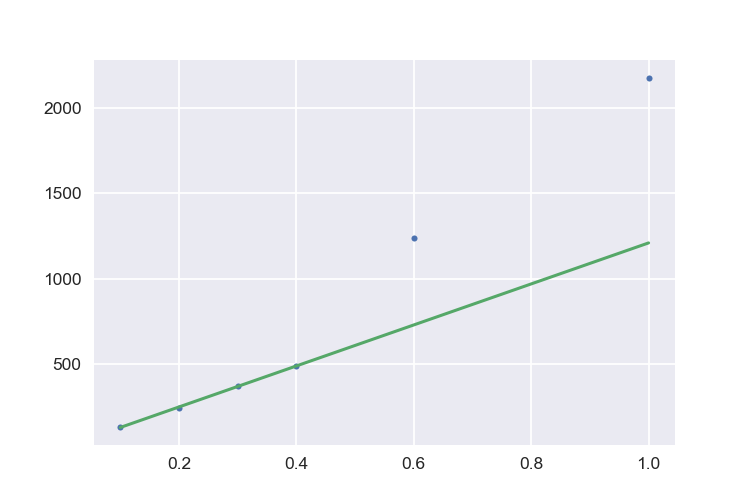

array([1202.84979102,    6.90515742])

In [429]:
%matplotlib notebook

def f(x,a,b):
    return a*x+b

plt.figure(figsize=(6,4))
x = p_np[:, 0]
y = p_np[:, 3]

params, popt = curve_fit(f, x[:4], y[:4])

plt.plot(x,y,'.')

plt.plot(p_np[:, 0], params[0]*x+params[1])
params

In [178]:
def calc_params(n_a):
    alpha = 0.3 * 10**3 #W
    lam = 850 * 10**(-9) #m
    F = 2 * 10**6 #Hz
    U = 30 #V
    c = 3 * 10**8 #m/s
    h = 6.6*10**(-34)
    zeta = 0.074
    nu = c/lam
    print('Алиса:')
    ph_aH = n_a
    print('Фотонов в гориз. компоненте Алисы', ph_aH)
    I_aH = F*h*nu*ph_aH
    print('Интенсивность в гориз. компоненте Алисы', I_aH, 'Дж', 10*np.log10(I_aH*1000), 'дБм')
    ph_aV = ph_aH*4*alpha**2/U**2
    print('Фотонов в верт. компоненте Алисы', ph_aV)
    I_aV = I_aH*4*alpha**2/U**2
    print('Интенсивность в верт. компоненте Алисы', I_aV, 'Дж', 10*np.log10(I_aV*1000), 'дБм')
    print()
    print('Боб:')
    ph_bH = ph_aH*zeta
    print('Фотонов в гориз. компоненте Боба', ph_bH)
    I_bH = I_aH*zeta
    print('Интенсивность в гориз. компоненте Боба', I_bH, 'Дж', 10*np.log10(I_bH*1000), 'дБм')
    ph_bV = ph_aV*zeta
    print('Фотонов в верт. компоненте Боба', ph_bV)
    I_bV = I_aV*zeta
    print('Интенсивность в верт. компоненте Боба', I_bV, 'Дж', 10*np.log10(I_bV*1000), 'дБм')
    I_bH = I_aH*zeta
    

In [179]:
calc_params(1)

Алиса:
Фотонов в гориз. компоненте Алисы 1
Интенсивность в гориз. компоненте Алисы 4.658823529411764e-13 Дж -93.3172373978878 дБм
Фотонов в верт. компоненте Алисы 400.0
Интенсивность в верт. компоненте Алисы 1.8635294117647055e-10 Дж -67.29663748460818 дБм

Боб:
Фотонов в гориз. компоненте Боба 0.074
Интенсивность в гориз. компоненте Боба 3.4475294117647046e-14 Дж -104.62492020057803 дБм
Фотонов в верт. компоненте Боба 29.599999999999998
Интенсивность в верт. компоненте Боба 1.379011764705882e-11 Дж -78.60432028729842 дБм


In [86]:
def dBm_to_J(I):
    return 10**(I/10)/1000
def J_to_dBm(I):
    return 10*np.log10(I*1000)

In [108]:
print(J_to_dBm(0.074), J_to_dBm(0.085))

18.692317197309762 19.294189257142925


<IPython.core.display.Javascript object>


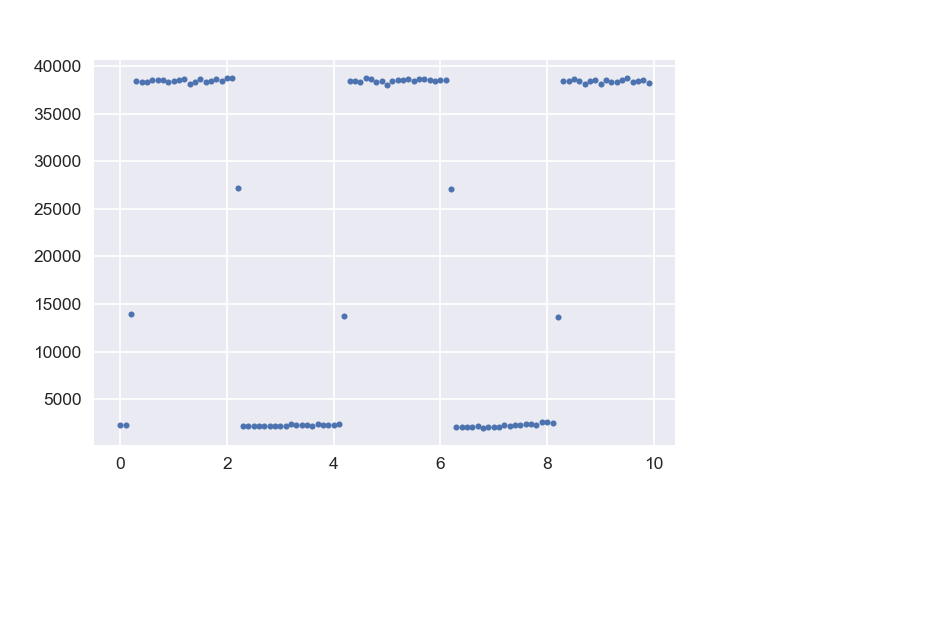

In [381]:
%matplotlib notebook
plt.figure(figsize=(6,4))
name = 'Counter-2-(0.6ph)_2022-02-28_20-51-39.txt'
file_path = os.path.join(dir_path, name)
plt.plot(data['x(ps)'][:len(data['counts'])//10], data['counts'][:len(data['counts(1/s)'])//10],'.', linewidth=2)

In [562]:
0.30*6/6.05

0.29752066115702475

In [575]:
np.mean([3,5,1,3])

3.0

In [576]:
np.mean(delta)

0.262

In [ ]:
a+b-ab